In [1]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:11<00:00, 181MB/s]
100% 1.06G/1.06G [00:11<00:00, 102MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [4]:
# generators - divide data into batches -useful to process large amount
# of data
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.


In [5]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [6]:
# Normalize the data [0-1]
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# Creating CNN Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation = 'relu',
                 input_shape =(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides =2,padding = 'valid'))

model.add(Flatten())

# Fully connected Layer
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics =['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 89ms/step - accuracy: 0.5800 - loss: 0.6898 - val_accuracy: 0.7538 - val_loss: 0.5107
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 81ms/step - accuracy: 0.7559 - loss: 0.5003 - val_accuracy: 0.7966 - val_loss: 0.4467
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 85ms/step - accuracy: 0.8110 - loss: 0.4091 - val_accuracy: 0.7816 - val_loss: 0.4871
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8689 - loss: 0.3000 - val_accuracy: 0.7902 - val_loss: 0.5639
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 90ms/step - accuracy: 0.9226 - loss: 0.1858 - val_accuracy: 0.7842 - val_loss: 0.8511
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 77ms/step - accuracy: 0.9573 - loss: 0.1145 - val_accuracy: 0.7606 - val_loss: 1.0325
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 72ms/step - accuracy: 0.9721 - loss: 0.0798 - val_accuracy: 0.7776 - val_loss: 1.1029
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 75ms/step - accuracy: 0.9833 - loss: 0.0491 - 

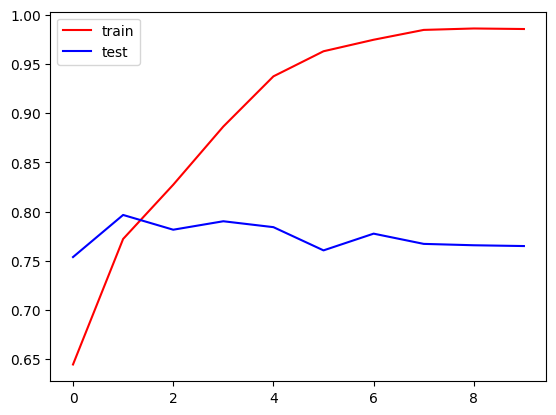

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'test')
plt.legend()
plt.show()

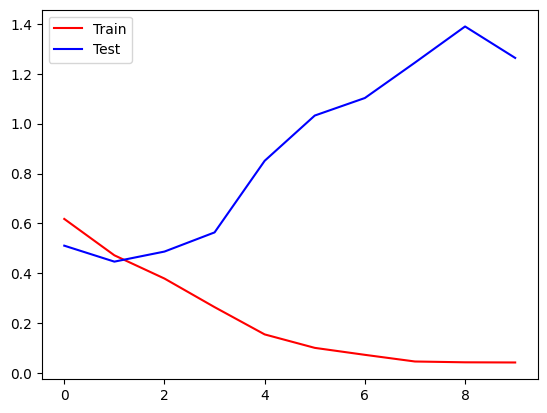

In [13]:
plt.plot(history.history['loss'],color = 'red',label = 'Train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'Test')
plt.legend()
plt.show()

In [14]:
 # Reduce Overfitting ways
 # Add more data
 # data Augmentation [create data using existing data]
 # L1/L2 regularizer
 # Dropout
 # Batch  Norm
 # Reduce Complexity

In [17]:
# Creating CNN Model with Batch Noramlisation and Dropout
from tensorflow import keras
from keras.layers import BatchNormalization,Dropout
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation = 'relu',
                 input_shape =(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides =2,padding = 'valid'))

model.add(Flatten())

# Fully connected Layer
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [20]:
model.compile(loss = 'binary_crossentropy',metrics = ['accuracy'],optimizer ='adam')

In [21]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 95ms/step - accuracy: 0.5580 - loss: 2.9693 - val_accuracy: 0.6104 - val_loss: 0.6487
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 95ms/step - accuracy: 0.6115 - loss: 0.6487 - val_accuracy: 0.5778 - val_loss: 0.7503
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 92ms/step - accuracy: 0.6441 - loss: 0.6205 - val_accuracy: 0.6586 - val_loss: 0.7516
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.7055 - loss: 0.5557 - val_accuracy: 0.7796 - val_loss: 0.4877
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - accuracy: 0.7543 - loss: 0.4656 - val_accuracy: 0.7714 - val_loss: 0.5188
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7902 - loss: 0.4173 - val_accuracy: 0.7700 - val_loss: 0.5083
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8261 - loss: 0.3561 - val_accuracy: 0.7302 - val_loss: 0.6173
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.8446 - loss: 0.3138 - 

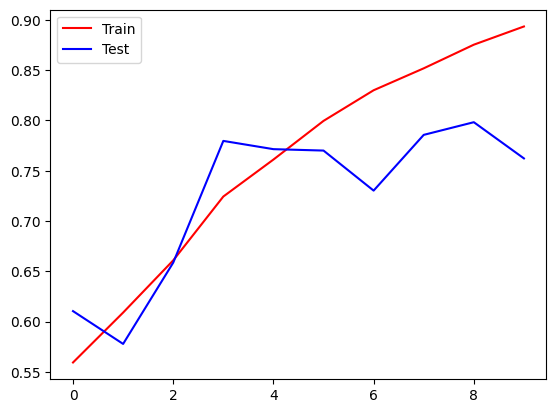

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red',label = 'Train')
plt.plot(history.history['val_accuracy'],color = 'blue',label ='Test')
plt.legend()
plt.show()

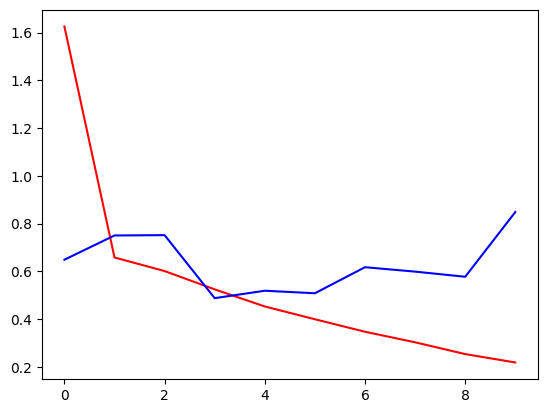

In [23]:
plt.plot(history.history['loss'],color='red',label ='Train')
plt.plot(history.history['val_loss'],color = 'blue',label ='Test')
plt.legend()
plt.show()

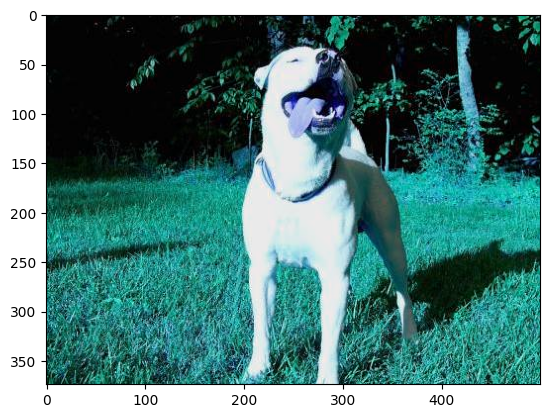

In [24]:
import cv2
test_img = cv2.imread('/content/Dog.jpg')
plt.imshow(test_img)

In [25]:
test_img.shape

(374, 500, 3)

In [26]:
test_img = cv2.resize(test_img,(256,256))

In [27]:
# Converting the data into 4D tensor for running the image through batches
test_input = test_img.reshape(1,256,256,3)
# There is only one image with shape(256,256,3)

In [29]:
model.predict(test_input) #1 Dog #0 Cat

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step


array([[1.]], dtype=float32)

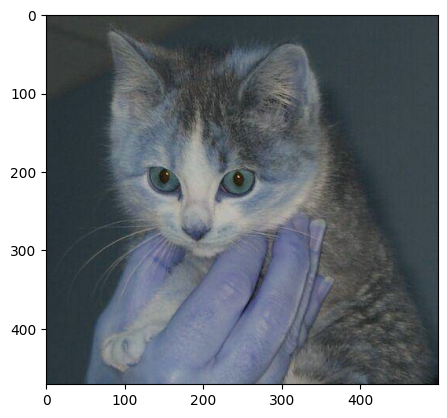

In [30]:
cat_test_img = cv2.imread('/content/cat.jpg')
plt.imshow(cat_test_img)

In [31]:
cat_test_img.shape

(471, 499, 3)

In [34]:
cat_test_img = cv2.resize(cat_test_img,(256,256))

In [35]:
cat_test_img = cat_test_img.reshape(1,256,256,3)
model.predict(cat_test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[0.]], dtype=float32)